<a href="https://colab.research.google.com/github/Divya-K-Gowda/DSP-exercises-NUCOT/blob/main/Copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#To upload the file from the local drive
from google.colab import files
uploaded=files.upload()

Saving StudentsPerformance.csv to StudentsPerformance.csv


In [ ]:
# Import the numpy and pandas packages
import numpy as np
import pandas as pd
# Write your code for importing the csv file here
Studentperformance = pd.read_csv('StudentsPerformance.csv')
Studentperformance


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


number of rows :  1000
number of columns :  8
 
Null values in each column
NaN count per column:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
total number of null values: 0
 
There are not any null values in the given data
Mean values:
math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

Median values:
math score       66.0
reading score    70.0
writing score    69.0
dtype: float64

Mode values:
math score       65
reading score    72
writing score    74
Name: 0, dtype: int64

Standard deviation values:
math score       15.163080
reading score    14.600192
writing score    15.195657
dtype: float64
==================Cleaning data to ensure everything is in numerical or boolean form=====================
 
 
 
       math scor

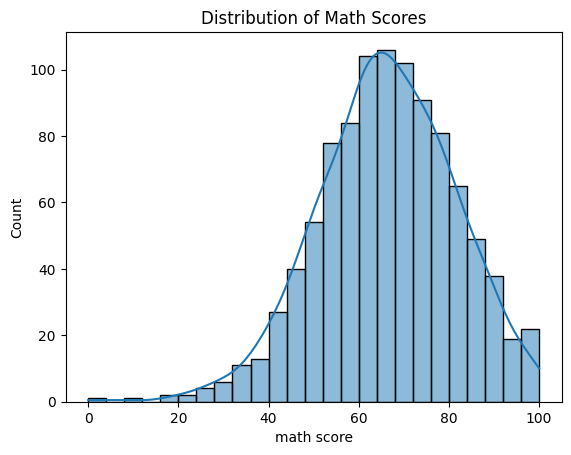

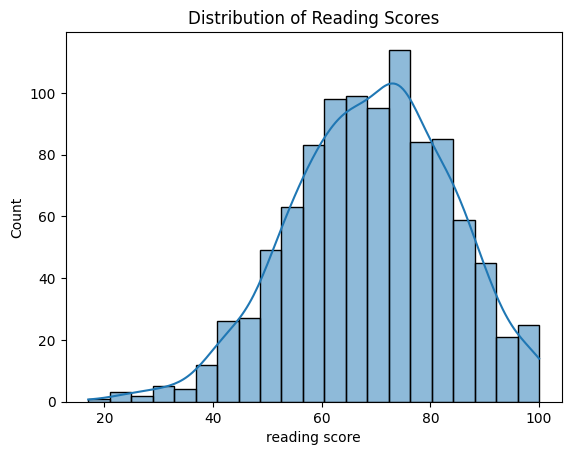

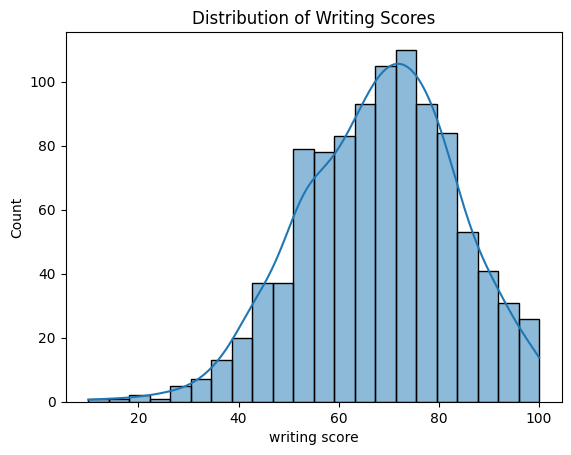

 
 
===========best for prediction===============


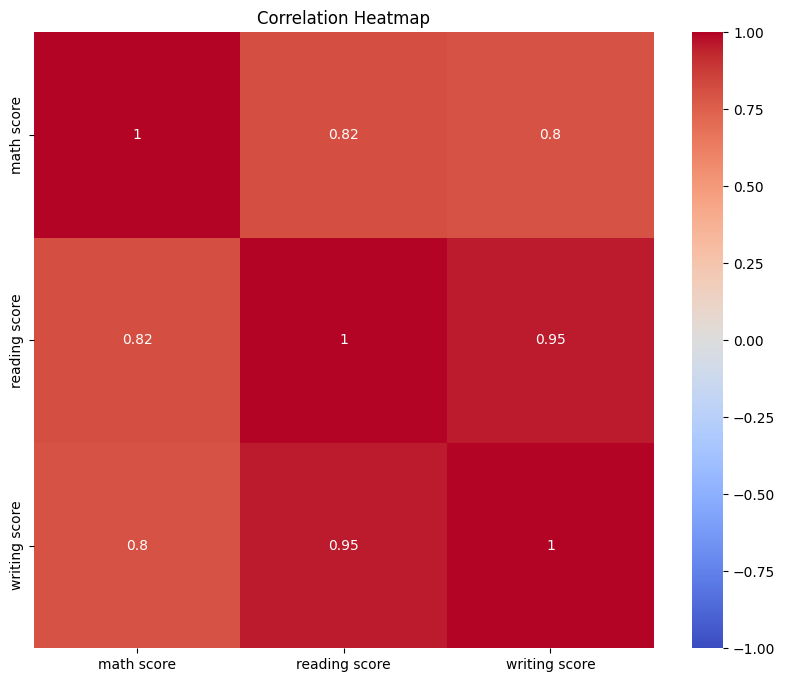

 
 
 =====================Relationship Analysis====================
               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000
 
 
 
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000
 
 
In the given dataset, there is no any outliers
 


<Figure size 200x200 with 0 Axes>

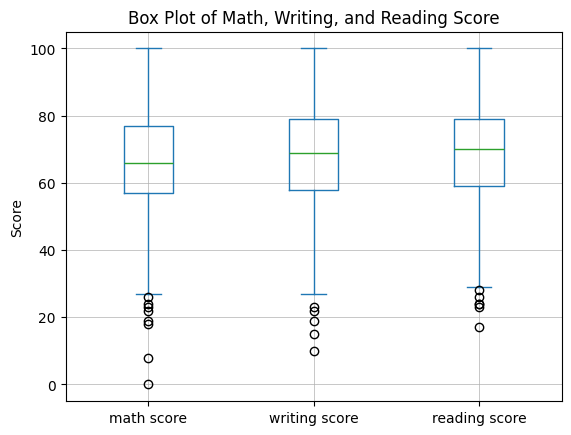

In [ ]:
df=pd.DataFrame(Studentperformance)
df
#obtaining the number of rows
print("number of rows : ", df.shape[0])

# obtaining the number of columns
print("number of columns : ", df.shape[1])
print(" ")

print("Null values in each column")

#obtaining null values in each column
column_nan_count = df.isnull().sum()
print("NaN count per column:")
print(column_nan_count)
print("total number of null values:",sum(column_nan_count[column_nan_count>0]))
print(" ")
print("There are not any null values in the given data")
print("===================================================================")

#Calculate mean, median, mode, and standard deviation for numeric columns (math score, reading score, writing score)
numeric_columns = ['math score', 'reading score', 'writing score']
numeric_data = df[numeric_columns]
mean_values = numeric_data.mean()
median_values = numeric_data.median()
mode_values = numeric_data.mode().iloc[0]
std_values = numeric_data.std()
print("Mean values:")
print(mean_values)
print("\nMedian values:")
print(median_values)
print("\nMode values:")
print(mode_values)
print("\nStandard deviation values:")
print(std_values)
print("===================================================================")

#Cleaning data to ensure everything is in numerical or boolean form
print("==================Cleaning data to ensure everything is in numerical or boolean form=====================")
print(" ")
df = pd.get_dummies(df, columns=['lunch', 'test preparation course','gender', 'race/ethnicity', 'parental level of education'], drop_first=True)
df.head()
print(" ")
print(" ")

import seaborn as sns
import matplotlib.pyplot as plt
print(df.describe())

print("=========================Distribution of  scores========================")

sns.histplot(df['math score'], kde=True)
plt.title('Distribution of Math Scores')
plt.show()

sns.histplot(df['reading score'], kde=True)
plt.title('Distribution of Reading Scores')
plt.show()

sns.histplot(df['writing score'], kde=True)
plt.title('Distribution of Writing Scores')
plt.show()
print(" ")
print(" ")

#to see which are best for prediction(Correlation Heatmap)
print("===========best for prediction===============")
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()
print(" ")
print(" ")
print(" =====================Relationship Analysis====================")
corrMatrix = df.select_dtypes(include=[float, int]).corr()
print(corrMatrix)
print(" ")
print(" ")
print(" ")
outliers=df.describe()
print(outliers)
print(" ")
print(" ")
print( "In the given dataset, there is no any outliers")
print(" ")

#box plot

plt.figure(figsize=(2,2))
df.plot.box(y=['math score', 'writing score', 'reading score'])

plt.title('Box Plot of Math, Writing, and Reading Score')
plt.ylabel('Score')
plt.grid(linewidth=.5)
plt.show()














=========================Univariate Analysis===============================================


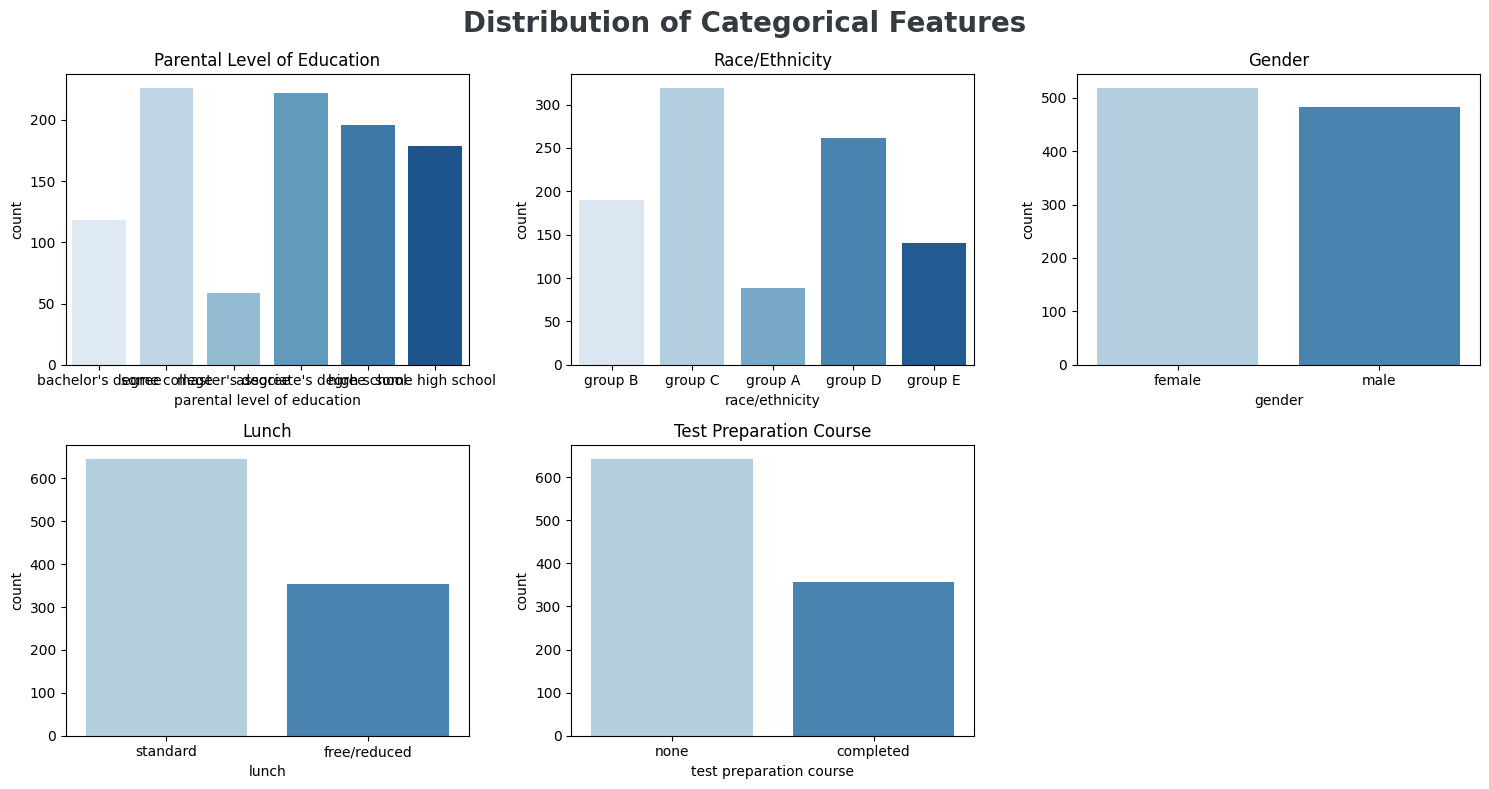

 
 
=================================================Bivariate Analysis=====================================


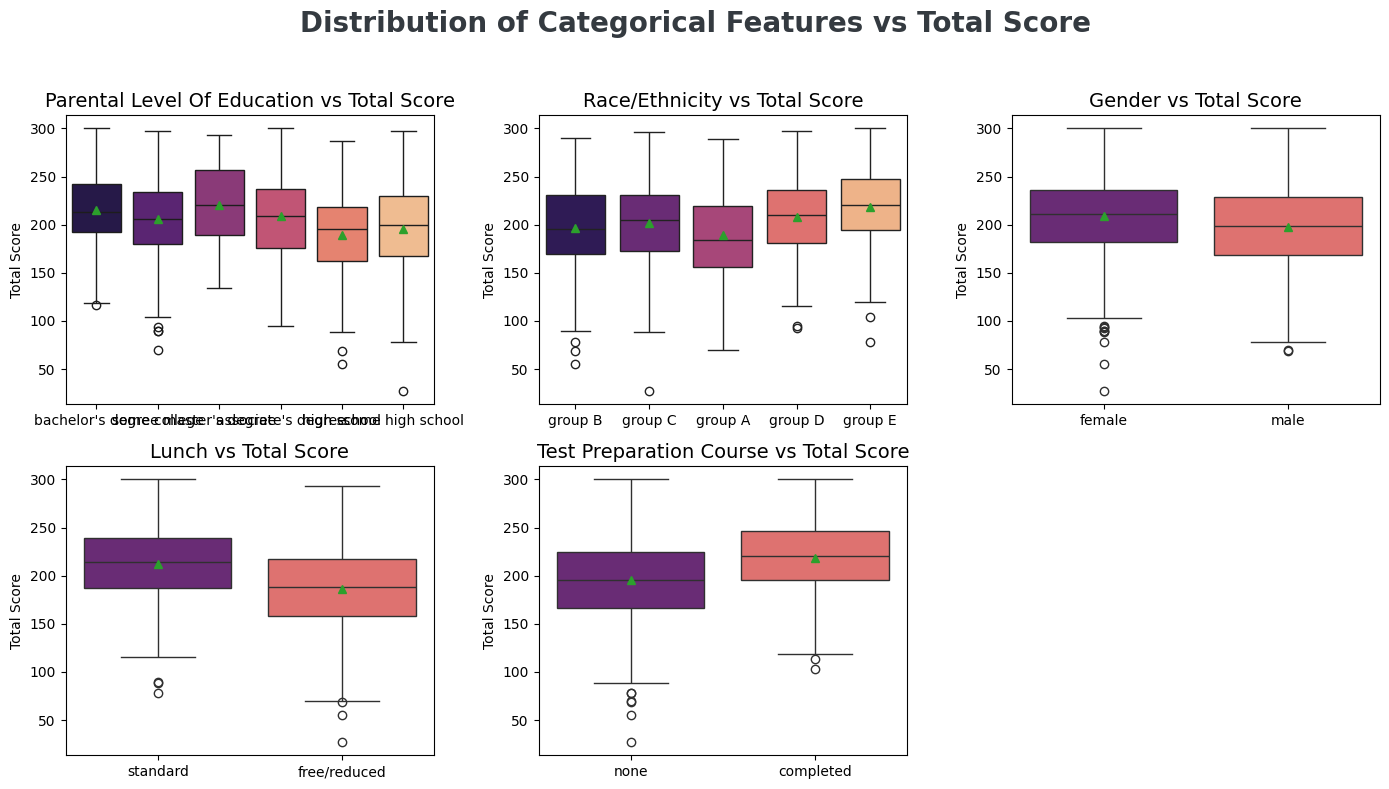

In [ ]:
# Univariate Analysis
print("=========================Univariate Analysis===============================================")
# creating a new features
df['Total Score'] = df['reading score'] + df['writing score'] + df['math score']

# Catrgorical Features Distribution
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,8))
axs=axs.flatten()

sns.countplot(data = df, x='parental level of education', palette='Blues', ax=axs[0])
axs[0].set_title("Parental Level of Education")

sns.countplot(data = df, x='race/ethnicity', palette='Blues', ax=axs[1])
axs[1].set_title("Race/Ethnicity")

sns.countplot(data = df, x='gender', palette='Blues', ax=axs[2])
axs[2].set_title("Gender")

sns.countplot(data = df, x='lunch', palette='Blues', ax=axs[3])
axs[3].set_title("Lunch")

sns.countplot(data = df, x='test preparation course', palette='Blues', ax=axs[4])
axs[4].set_title("Test Preparation Course")

axs[5].remove()

plt.suptitle("Distribution of Categorical Features",  fontsize=20, fontweight='bold', color='#343A40')
plt.tight_layout()
plt.show()
print(" ")
print(" ")
print("=================================================Bivariate Analysis=====================================")
# List of categorical features to plot
categorical_features = ['parental level of education', 'race/ethnicity', 'gender', 'lunch', 'test preparation course']

# Create a figure with adjusted size
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))
axs = axs.flatten()


for i, feature in enumerate(categorical_features):
    sns.boxplot(x=feature, y='Total Score', showmeans=True,  data=df, palette='magma',ax=axs[i])
    axs[i].set_title(f"{feature.replace('_', ' ').title()} vs Total Score", fontsize=14)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Total Score')
    axs[i].tick_params(axis='x', rotation=0)

axs[5].remove()

plt.suptitle("Distribution of Categorical Features vs Total Score", fontsize=20, fontweight='bold', color='#343A40')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
print(" ")
print(" ")
print(" ")


=================================BAR PLOT===========================================================


<ipython-input-75-215514e0f534>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, ax=axs[0,0], palette='gist_stern')
<ipython-input-75-215514e0f534>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='race/ethnicity', data=df, ax=axs[0,1], palette='inferno')
<ipython-input-75-215514e0f534>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='parental level of education', data=df, ax=axs[1,0], palette='magma')
<ipython-input-75-215514e0f534>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecat

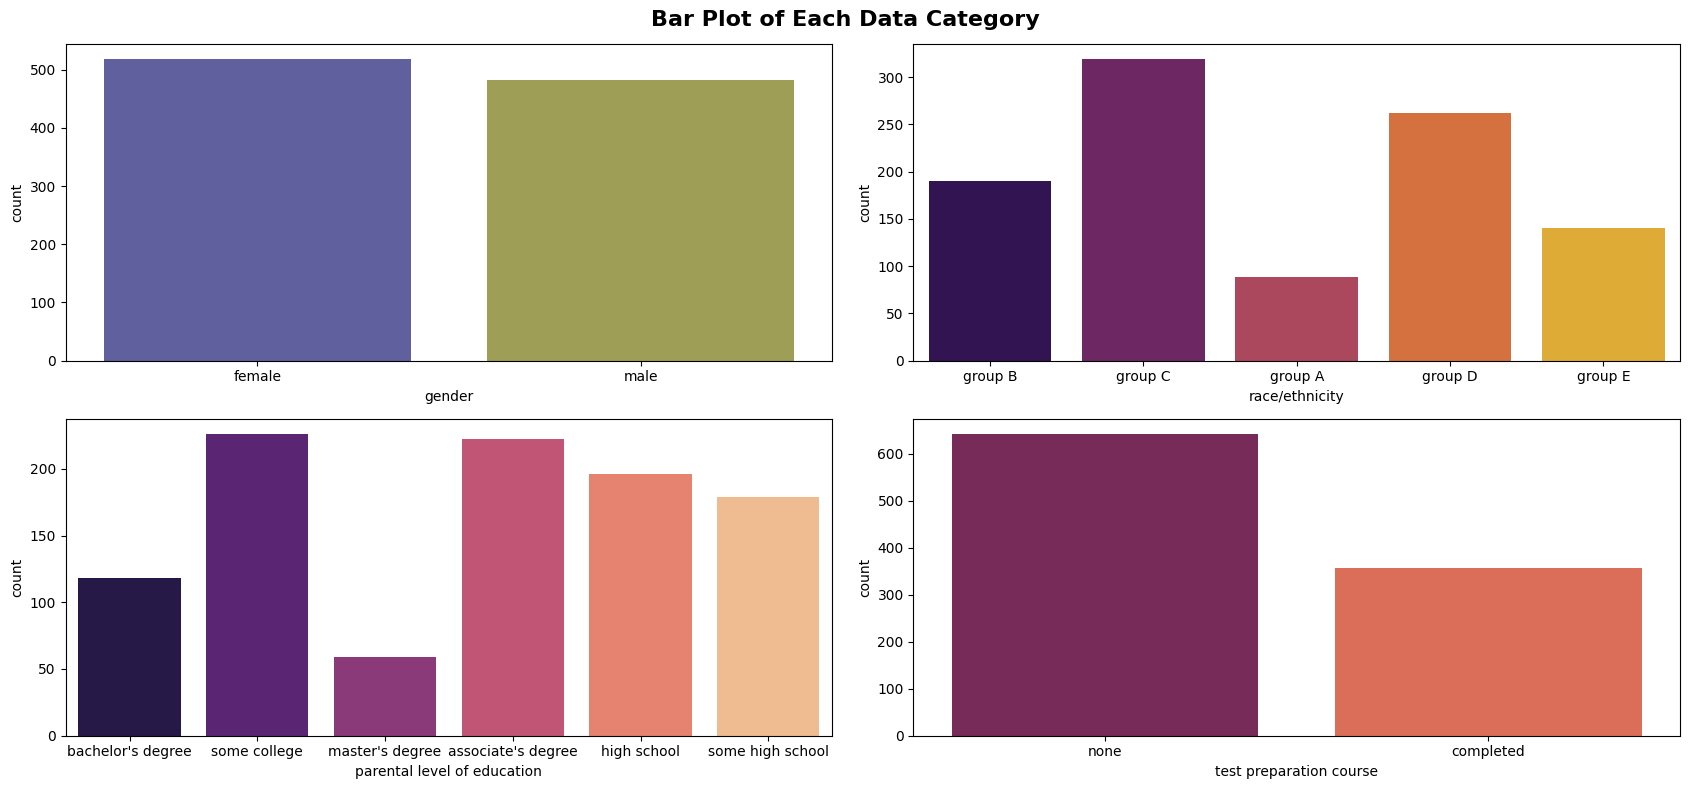

 
=====================================================================================PIE PLOT=================


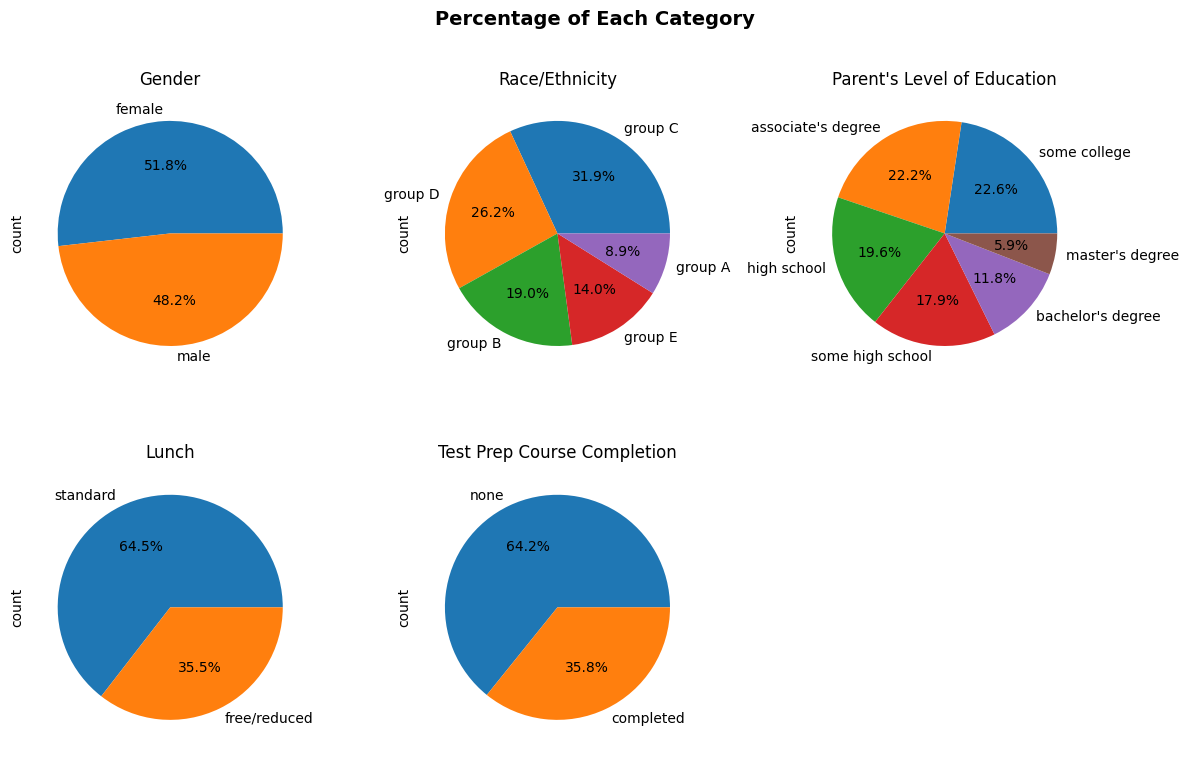

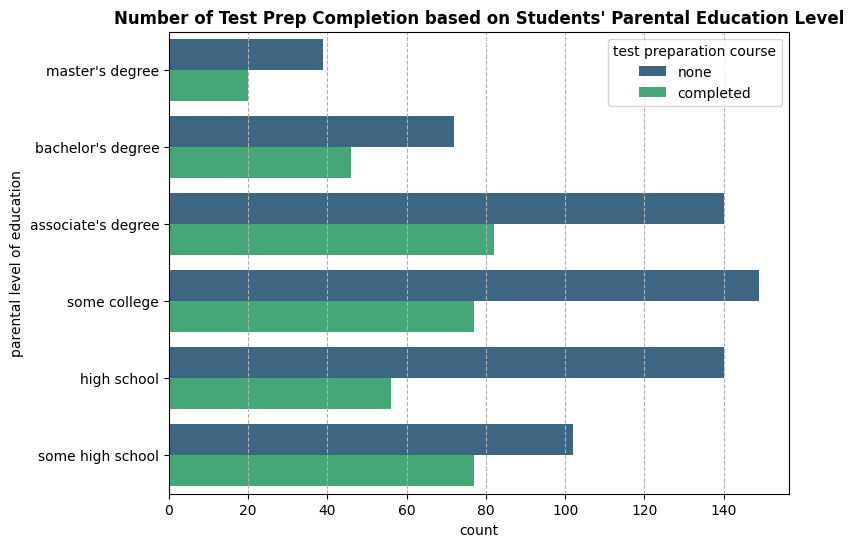

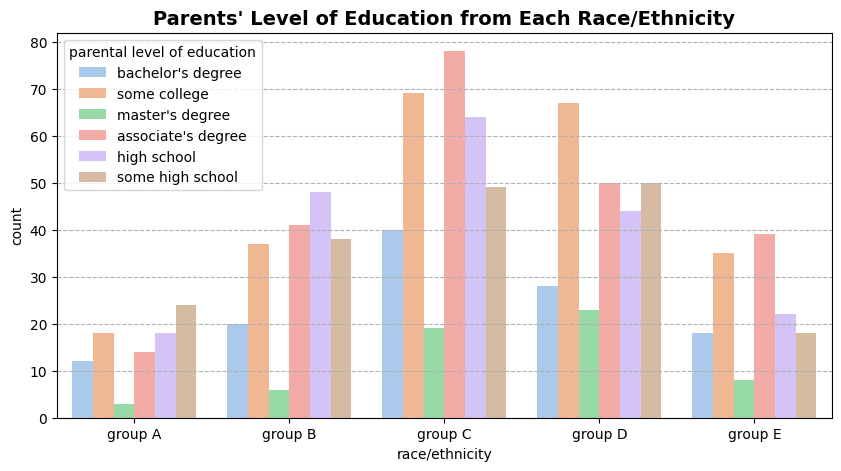

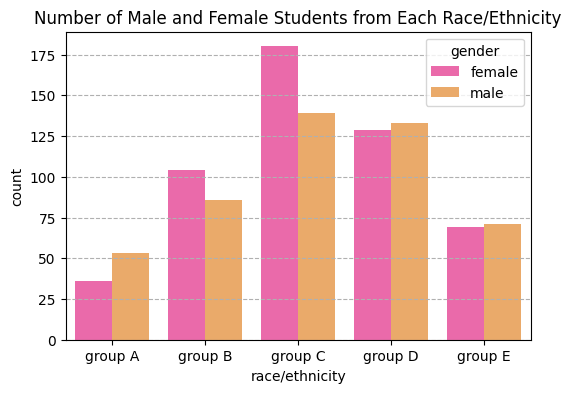

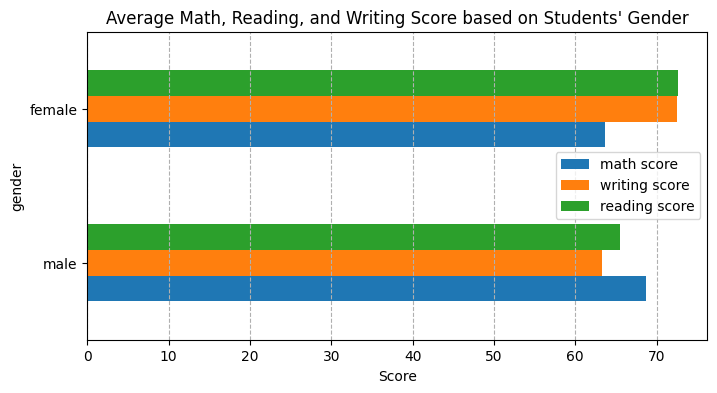

Male students have higher MATH average score, but female students have higher WRITING and READING average score.
 
 



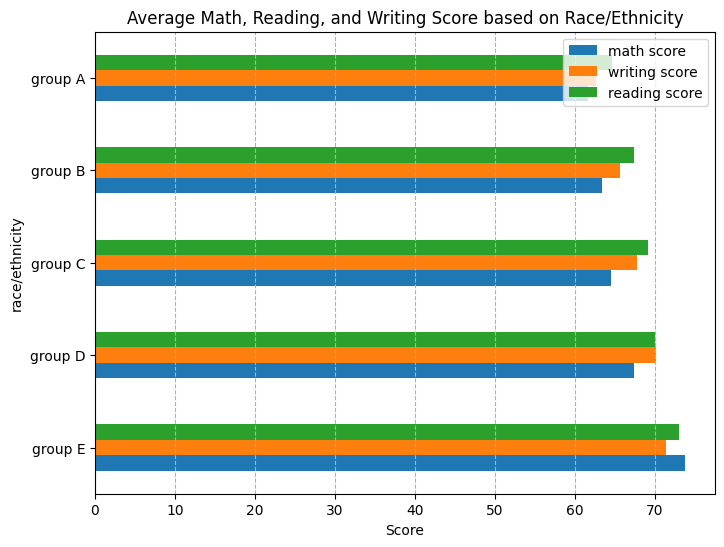

**From the plot and values above, it can be concluded that students from race/ethnicity 'group E' has the highest average score in math, writing, and reading, followed by students from group D, C, B, and A.**

 


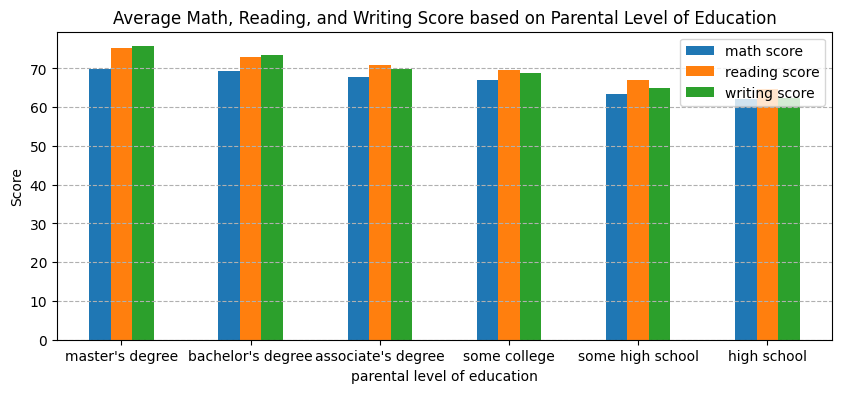

**Students whose parents have master's degree tend to have the highest average score in all subjects.**
**As shown above, the higher the parents education is, the higher average score the students get.**
 


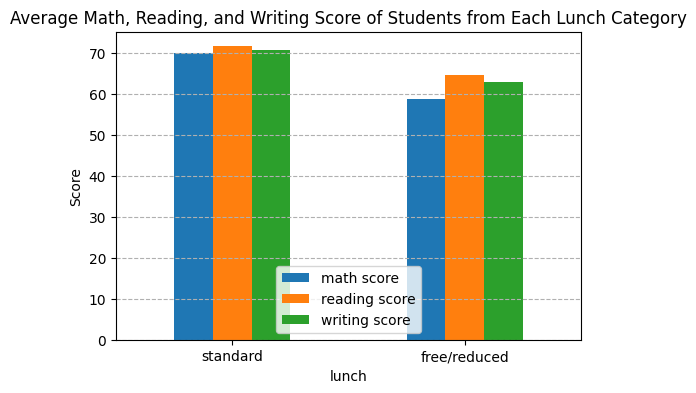

**Those who have standard lunch which is implied as the paid and not reduced based on the other category name tend to have higher AVERAGE score in all three subjects.**
**This shows that the lunch program of the student also affects their score, where those with standard lunch have higher average score.**
 
 


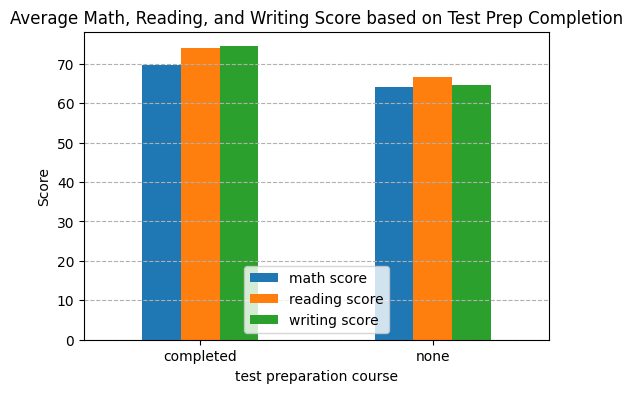

**Those who have completed the test preparation course have higher AVERAGE score in math, reading, and writing.*
 
 
===================================================================Correlation between Score in Each Subject===============
 


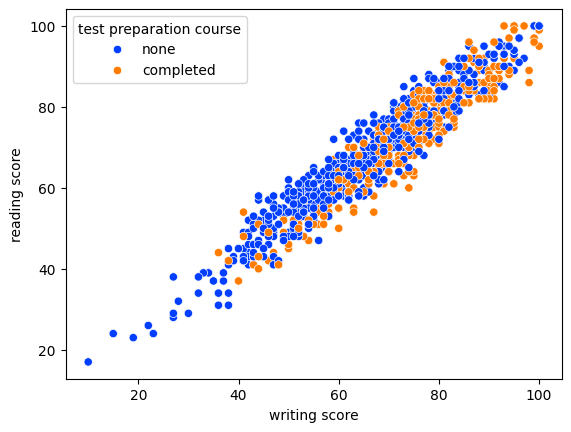


**As we can see from the scatter plot above, when we trace the plot from left to right, the writing score and reading score follow the same line pattern.**
**It shows that when the writing scores increase, the reading scores tend to increase as well.**
**This shows that the two factors have a positive correlation thus can be concluded that writing and reading score correlate strongly with each other.**
 


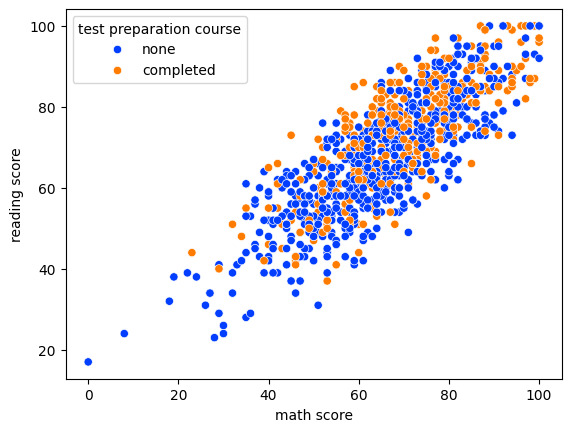

**In a glimpse, the dots seem to follow the same uphill line pattern from left to right, meaning the two factors have positive correlation.**
**However, the data points are more spread out compared to the previous scatter plot. This means that reading score has weaker correlation with math score that it does with writing score.**
 


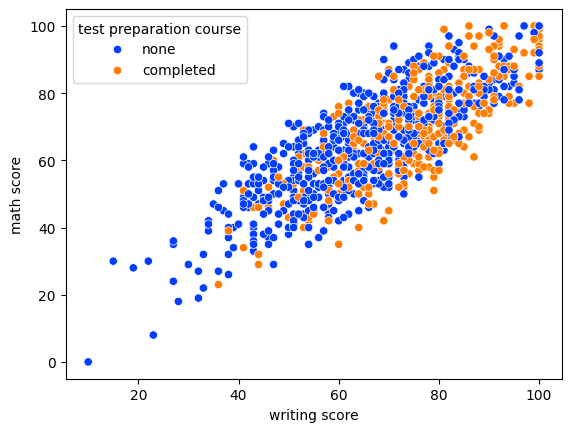

**Although the data points are not totally clustered, we could say that writing course and math score are somewhat correlated as the plot shows that writing score increases as math score increases.**


In [ ]:
#Overall Dataset Visualization
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('StudentsPerformance.csv')
df.head()

#Bar Plot of Categorical Data
print("=================================BAR PLOT===========================================================")
fig, axs = plt.subplots(2,2, figsize=(17,8))

sns.countplot(x='gender', data=df, ax=axs[0,0], palette='gist_stern')
sns.countplot(x='race/ethnicity', data=df, ax=axs[0,1], palette='inferno')
sns.countplot(x='parental level of education', data=df, ax=axs[1,0], palette='magma')
sns.countplot(x='test preparation course', data=df, ax=axs[1,1], palette='rocket')

plt.suptitle('Bar Plot of Each Data Category', fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()

print(" ")

#PIE Plot of Categorical Data
print("=====================================================================================PIE PLOT=================")
plt.figure(figsize=(12,8))
plt.suptitle('Percentage of Each Category', fontweight='bold', fontsize=14)

plt.subplot(231)
plt.title('Gender')
df['gender'].value_counts().plot.pie(autopct='%1.1f%%');

plt.subplot(232)
plt.title('Race/Ethnicity')
df['race/ethnicity'].value_counts().plot.pie(autopct='%1.1f%%');

plt.subplot(233)
plt.title("Parent's Level of Education")
df['parental level of education'].value_counts().plot.pie(autopct='%1.1f%%');

plt.subplot(234)
plt.title('Lunch')
df['lunch'].value_counts().plot.pie(autopct='%1.1f%%');

plt.subplot(235)
plt.title('Test Prep Course Completion')
df['test preparation course'].value_counts().plot.pie(autopct='%1.1f%%');

plt.tight_layout()

#Count certain category when sorted by another category
#Test Preparation Course Completion Number based on Students' Parents' Education Level
plt.figure(figsize=(8,6))
sns.countplot(y='parental level of education',
              hue='test preparation course',
              data=df,
              palette='viridis',
              order=["master's degree", "bachelor's degree", "associate's degree", "some college", "high school", "some high school"])

plt.title("Number of Test Prep Completion based on Students' Parental Education Level", fontweight='bold', fontsize=12)

plt.grid(linestyle='--', axis='x')
plt.show()


df.groupby('parental level of education')['test preparation course'].value_counts().to_frame()

#Parents' Education Level based on Race/Ethnicity
plt.figure(figsize=(10,5))

sns.countplot(x='race/ethnicity',
              hue='parental level of education',
              data=df,
              order=['group A', 'group B', 'group C', 'group D', 'group E'],
              palette='pastel')

plt.title("Parents' Level of Education from Each Race/Ethnicity", fontweight='bold', fontsize=14)
plt.grid(linestyle='--', axis='y')

plt.show()

df.groupby('race/ethnicity')['parental level of education'].value_counts().to_frame()

#Number of Male and Female Students from Each Race/Ethnicity
plt.figure(figsize=(6,4))

sns.countplot(x='race/ethnicity',
              hue='gender',
              data=df,
              order=['group A', 'group B', 'group C', 'group D', 'group E'],
              palette='spring')

plt.title('Number of Male and Female Students from Each Race/Ethnicity')
plt.grid(linestyle='--',
         axis='y')

plt.show()

df.groupby('race/ethnicity')['gender'].value_counts().to_frame()

#Correlation between the Factors and Students' Score
#Students' Gender and Scores
g = df.groupby('gender')[['math score', 'writing score', 'reading score']].mean()
g_sorted = g.sort_values(by=['math score', 'writing score', 'reading score'], ascending=False)

g_sorted.plot.barh(figsize=(8,4))

plt.title("Average Math, Reading, and Writing Score based on Students' Gender")
plt.xlabel('Score')
plt.grid(linestyle='--',
         axis='x')

plt.show()

g_sorted

print("Male students have higher MATH average score, but female students have higher WRITING and READING average score.")
print(" ")
print(" ")
print("==============================================================================================================")
print("")
#Students' Race/Ethnicity and Scores
r = df.groupby('race/ethnicity')[['math score', 'writing score', 'reading score']].mean()
r_sorted = r.sort_values(by=['math score', 'writing score', 'reading score'], ascending=False)

r_sorted.plot.barh(figsize=(8,6))

plt.title('Average Math, Reading, and Writing Score based on Race/Ethnicity')
plt.xlabel('Score')
plt.grid(linestyle='--',
         axis='x')

plt.show()

r_sorted
print("**From the plot and values above, it can be concluded that students from race/ethnicity 'group E' has the highest average score in math, writing, and reading, followed by students from group D, C, B, and A.**")
print("")
print("==============================================================================================================")
print(" ")


#Students' Parental Level of Education and Scores
p = df.groupby(['parental level of education'])[['math score', 'reading score', 'writing score']].mean()
p_sorted = p.sort_values(by=['math score', 'reading score', 'writing score'], ascending=False)

p_sorted.plot.bar(figsize=(10,4))

plt.xticks(rotation=0)
plt.title('Average Math, Reading, and Writing Score based on Parental Level of Education')
plt.ylabel('Score')

plt.grid(linestyle='--', axis='y')

plt.show()

p_sorted
print("**Students whose parents have master's degree tend to have the highest average score in all subjects.**")
print("**As shown above, the higher the parents education is, the higher average score the students get.**")
print("==============================================================================================================")
print(" ")

#Students' Lunch and Scores
l = df.groupby(['lunch'])[['math score', 'reading score', 'writing score']].mean()
l_sorted = l.sort_values(by=['math score', 'reading score', 'writing score'], ascending=False)

l_sorted.plot.bar(figsize=(6,4))
plt.grid(linestyle='--',
         axis='y')

plt.legend(loc='lower center')
plt.xticks(rotation=0)

plt.title('Average Math, Reading, and Writing Score of Students from Each Lunch Category')
plt.ylabel('Score')

plt.show()
l_sorted
print("**Those who have standard lunch which is implied as the paid and not reduced based on the other category name tend to have higher AVERAGE score in all three subjects.**")

print("**This shows that the lunch program of the student also affects their score, where those with standard lunch have higher average score.**")
print(" ")
print("================================================================================================================")
print(" ")

#Students' Test Preparation Course Completion and Scores
t = df.groupby(['test preparation course'])[['math score', 'reading score', 'writing score']].mean()
t_sorted = t.sort_values(by=['math score', 'reading score', 'writing score'], ascending=False)

t_sorted.plot.bar(figsize=(6,4))
plt.xticks(rotation=0)
plt.grid(linestyle='--',
         axis='y')

plt.title('Average Math, Reading, and Writing Score based on Test Prep Completion')
plt.ylabel('Score')
plt.legend(loc='best')

plt.show()
t_sorted
print("**Those who have completed the test preparation course have higher AVERAGE score in math, reading, and writing.*")
print(" ")
print("================================================================================================================")
print(" ")

#Correlation between Score in Each Subject
print("===================================================================Correlation between Score in Each Subject===============")
print(" ")
sns.scatterplot(x='writing score', y='reading score', data=df, hue='test preparation course', palette='bright')
plt.show()
print("")
print("**As we can see from the scatter plot above, when we trace the plot from left to right, the writing score and reading score follow the same line pattern.**")
print("**It shows that when the writing scores increase, the reading scores tend to increase as well.**")
print("**This shows that the two factors have a positive correlation thus can be concluded that writing and reading score correlate strongly with each other.**")
print("================================================================================================================")
print(" ")
sns.scatterplot(x='math score', y='reading score', data=df, hue='test preparation course', palette='bright')
plt.show()
print("**In a glimpse, the dots seem to follow the same uphill line pattern from left to right, meaning the two factors have positive correlation.**")
print("**However, the data points are more spread out compared to the previous scatter plot. This means that reading score has weaker correlation with math score that it does with writing score.**")
print(" ")
print("==================================================================================================================")
sns.scatterplot(x='writing score', y='math score', data=df, hue='test preparation course', palette='bright')
plt.show()
print("**Although the data points are not totally clustered, we could say that writing course and math score are somewhat correlated as the plot shows that writing score increases as math score increases.**")




In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('StudentsPerformance.csv')
df
#Predictive Modeling-a simple predictive model for writing scores based on math and reading scores
X = df[['math score', 'reading score']]
y = df['writing score']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2



(23.665243336391317, 0.9018108855760416)

<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

<div class="markdown-google-sans">
  <h2>Explore the Gemini API</h2>
  <p>The Gemini API gives you access to Gemini models created by Google DeepMind. Gemini models are built from the ground up to be multimodal, so you can reason seamlessly across text, images, code, and audio.
  </p>
  <strong>How to get started</strong>
    <ol>
      <li>Go to <a href="https://aistudio.google.com/">Google AI Studio</a> and log in with your Google account.</li>
      <li><a href="https://aistudio.google.com/app/apikey">Create an API key</a>.</li>
      <li>Use a quickstart for <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Prompting.ipynb">Python</a>, or call the REST API using <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb">curl</a>.</li>
      </ol>
  <strong>Explore use cases</strong>
    <ul>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Market_a_Jet_Backpack.ipynb">Create a marketing campaign</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Audio.ipynb">Analyze audio recordings</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/System_instructions.ipynb">Use System instructions in chat</a></li>
    </ul>
  <p>To learn more, check out the <a href="https://github.com/google-gemini/cookbook">Gemini cookbook</a> or visit the <a href="https://ai.google.dev/docs/">Gemini API documentation</a>.
  </p>
</div>


<msg desc="Text shown above a link to https://www.youtube.com/watch?v=V7RXyqFUR98 which highlights some helpful features in Colab">Colab now has AI features powered by <a href="https://gemini.google.com">Gemini</a>. The video below provides information on how to use these features, whether you're new to Python, or a seasoned veteran.</msg>

<center>
  <a href="https://www.youtube.com/watch?v=V7RXyqFUR98" target="_blank">
  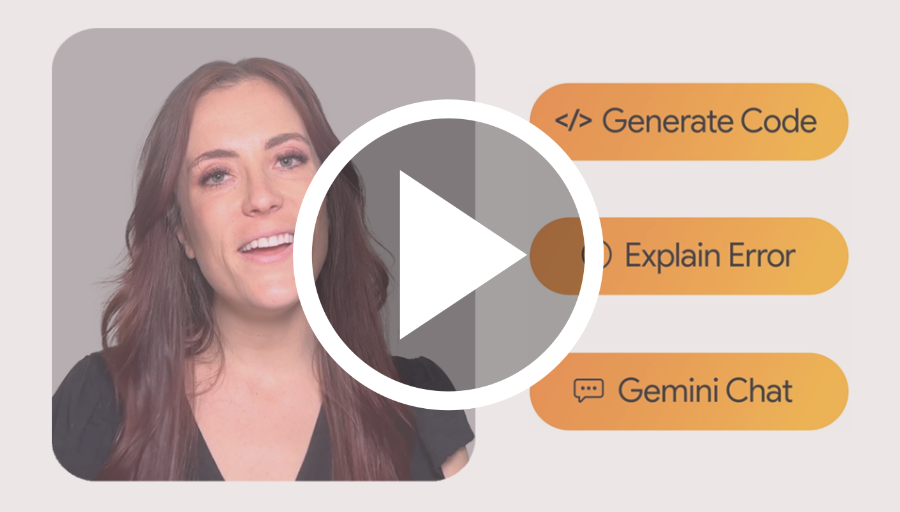
  </a>
</center>

<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) or [Colab Features You May Have Missed](https://www.youtube.com/watch?v=rNgswRZ2C1Y) to learn more, or just get started below!

<div class="markdown-google-sans">

## **Getting started**
</div>

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

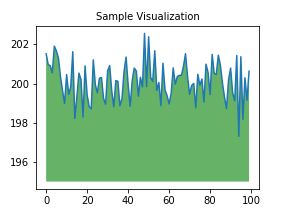

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

For example, if you find yourself waiting for **pandas** code to finish running and want to go faster, you can switch to a GPU Runtime and use libraries like [RAPIDS cuDF](https://rapids.ai/cudf-pandas) that provide zero-code-change acceleration.

To learn more about accelerating pandas on Colab, see the [10 minute guide](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb) or
 [US stock market data analysis demo](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb).

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Intro to RAPIDS cuDF to accelerate pandas](https://nvda.ws/rapids-cudf)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
